
**Dataset Info:**
Sample Data Set containing customer data and showing customers who have left last month

In [59]:
#import the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline


## Univariate Analysis

In [60]:

telco_base_data = (pd.read_csv('Churn_Modelling.csv'))

In [61]:
telco_base_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [62]:
telco_new = telco_base_data[['Geography', 'Gender', 'Exited']]

telco_new.head()

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


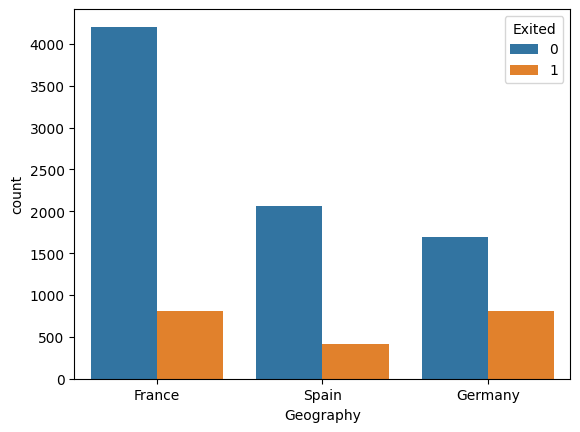

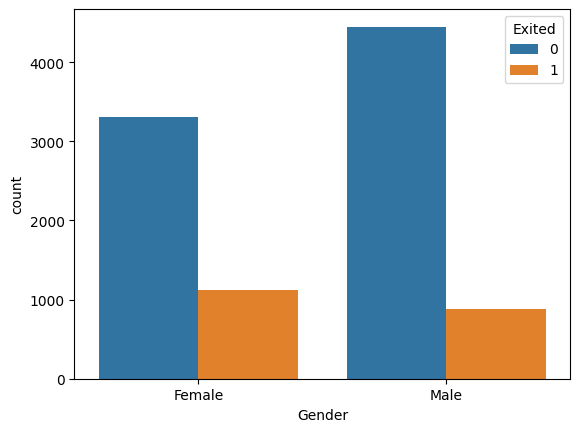

In [63]:
# Count plot (seaborn)

for i, predictor in enumerate(telco_new.drop(columns='Exited')):
    plt.figure()
    sns.countplot(data=telco_new, x=predictor, hue='Exited')

In [64]:
telco_new.Exited.value_counts() / len(telco_new)*100

# what is the percentage of exited

Exited
0    79.63
1    20.37
Name: count, dtype: float64

## Bivariate Analysis

<Axes: xlabel='Gender', ylabel='Count'>

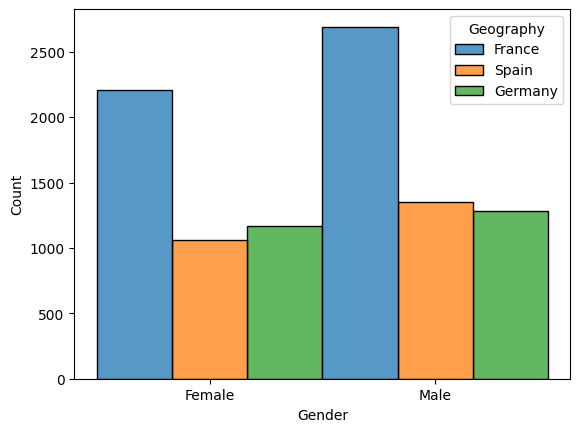

In [65]:
# seaborn hist plot

sns.histplot(x='Gender', hue="Geography", data=telco_new, stat="count", multiple="dodge")

In [66]:
telco_new_target1 = telco_new.loc[telco_new['Exited']==1] # just churn customers

<Axes: xlabel='Gender', ylabel='Count'>

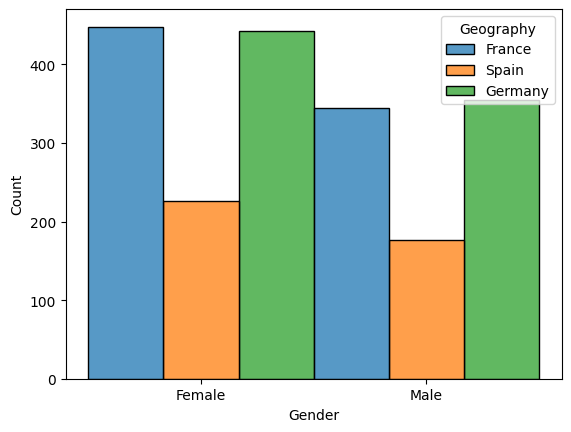

In [67]:
sns.histplot(x='Gender', hue="Geography", data=telco_new_target1, stat="count", multiple="dodge")

## Numerical Analysis

Correlation: It ranges from -1 to +1

- +1 --> Positive Correlation
- -1 --> Negative Correlation
- ~0 --> No Correlation

In [68]:
# plot correlation

# telco_base_data.drop(columns=["Surname"]).corr()

telco_base_data=telco_base_data.select_dtypes(include=[np.number]).corr()
telco_base_data

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.001533,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009189,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,0.000432,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.001533,0.009189,0.000432,1.000000,-0.010324,0.030507,-0.028956,-0.010764,0.084558,-0.014692,0.278732
Tenure,-0.006495,-0.014883,0.000842,-0.010324,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.030507,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.028956,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.010764,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.084558,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.014692,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [69]:
# based on this correlation table above, the highest correlation is age:Exited of 0.278732

<Axes: >

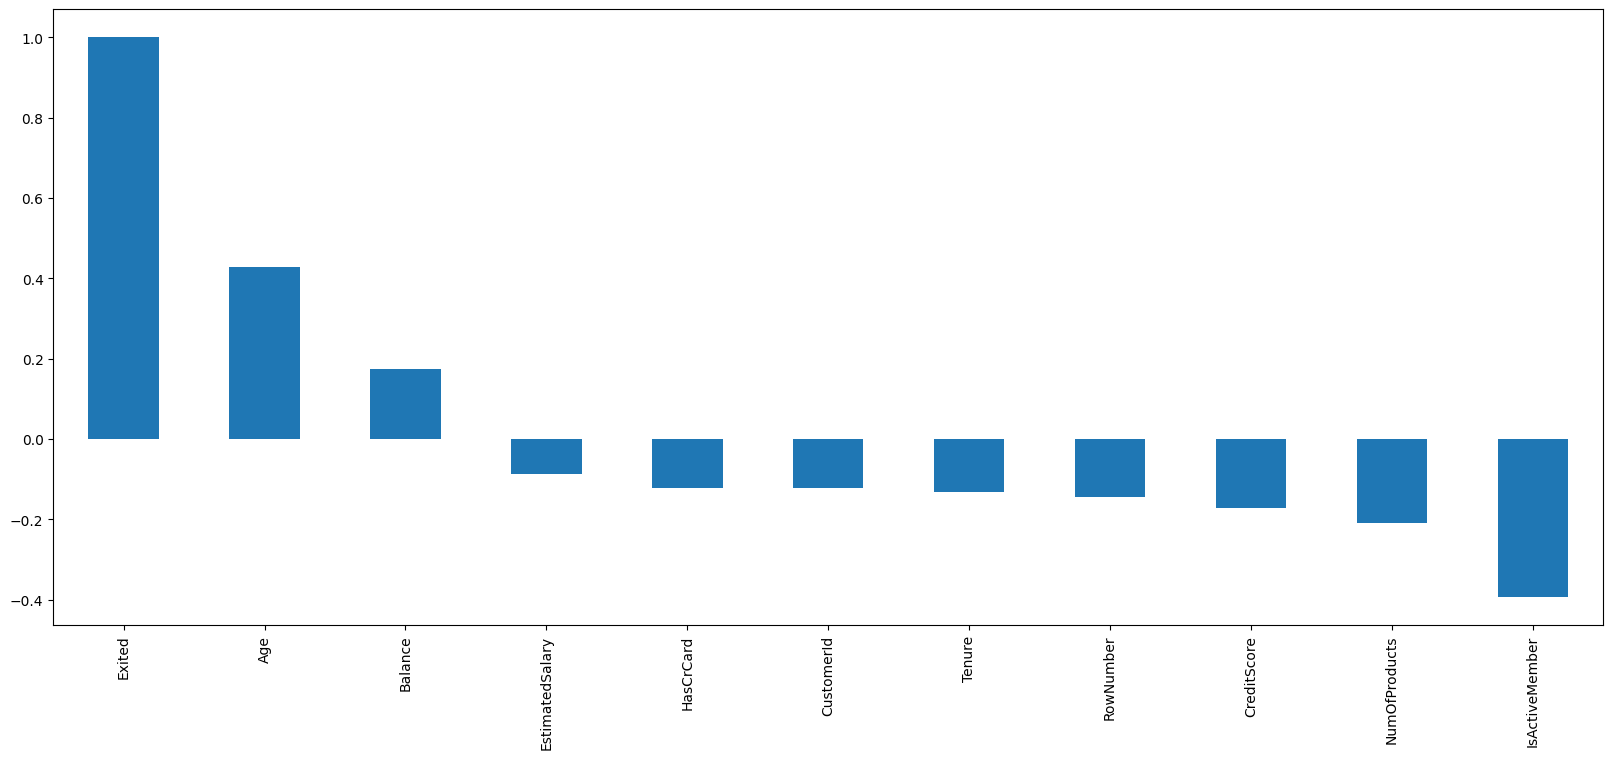

In [70]:
plt.figure(figsize=(20,8))
telco_base_data.corr()['Exited'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

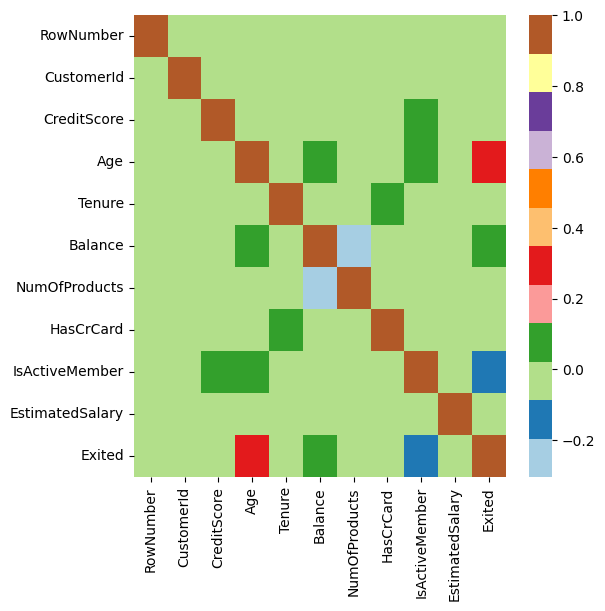

In [71]:
telco_base_data = (pd.read_csv('Churn_Modelling.csv'))
telco_base_data=telco_base_data.select_dtypes(include=[np.number])
plt.figure(figsize=(6,6))
sns.heatmap(telco_base_data.corr(), cmap='Paired')

In [72]:

telco_base_data = (pd.read_csv('Churn_Modelling.csv'))
telco_base_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='Age'>

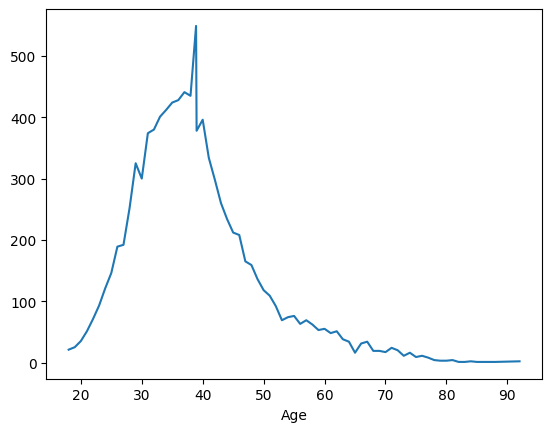

In [73]:
# bar chart for age doesn't make sense because 18-99 is a ton of bars
# instead use bins

telco_base_data['Age'].value_counts().sort_index(ascending=True).plot()

<Axes: xlabel='Age'>

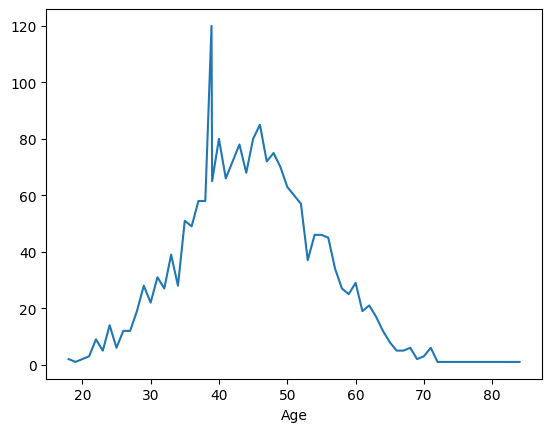

In [74]:
telco_base_data_1 = telco_base_data.loc[telco_base_data['Exited']==1]

telco_base_data_1['Age'].value_counts().sort_index(ascending=True).plot()

Text(0.5, 1.0, 'Age by Churn')

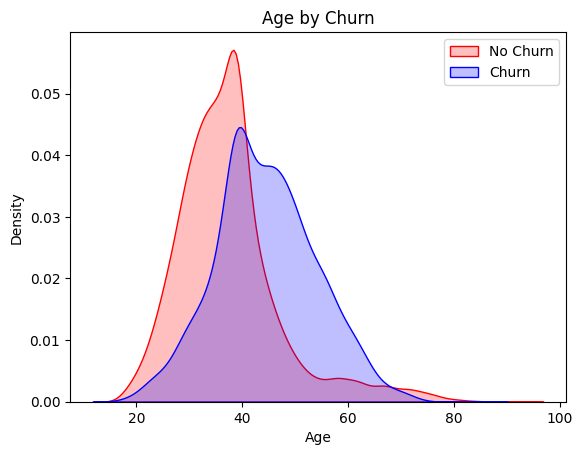

In [77]:
Tot = sns.kdeplot(telco_base_data.Age[(telco_base_data['Exited']==0)], color='Red', fill=True)
Tot = sns.kdeplot(telco_base_data.Age[(telco_base_data['Exited']==1)], color='Blue', fill=True)
Tot.legend(['No Churn', 'Churn'], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Age')
Tot.set_title('Age by Churn')
